**Implement a deep generative model using a Recurrent Neural Network (RNN) to generate sequential data using the given dataset. Your task is as follows:**
1. Design an RNN-based generative model capable of learning patterns in the data and generating new sequences.
2. Use an appropriate RNN variant (e.g., vanilla RNN, LSTM, or GRU).
3. Train the model to generate sequences based on the training data.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

# Load and preprocess the data
with open('RNN 3.txt', 'r') as file:
    text = file.read()

# Preprocessing: Character-level tokenization
chars = sorted(set(text))  # Unique characters
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for idx, char in enumerate(chars)}

# Convert text to sequences of indices
sequence_length = 50  # Length of input sequences
step = 1  # Step size for creating sequences
sequences = []
next_chars = []

for i in range(0, len(text) - sequence_length, step):
    sequences.append(text[i: i + sequence_length])
    next_chars.append(text[i + sequence_length])

X = np.zeros((len(sequences), sequence_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sequences), len(chars)), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the LSTM model
model = Sequential([
    LSTM(128, input_shape=(sequence_length, len(chars))),
    Dense(len(chars), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model
epochs = 20
batch_size = 64

model.fit(X, y, batch_size=batch_size, epochs=epochs)

# Text generation function
def generate_text(seed, length=200, temperature=1.0):
    generated_text = seed
    input_seq = np.zeros((1, sequence_length, len(chars)))

    for i, char in enumerate(seed):
        if char in char_to_idx:
            input_seq[0, i, char_to_idx[char]] = 1

    for _ in range(length):
        preds = model.predict(input_seq, verbose=0)[0]
        preds = np.asarray(preds).astype('float64')
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        next_index = np.random.choice(len(chars), p=preds)
        next_char = idx_to_char[next_index]

        generated_text += next_char

        input_seq = np.roll(input_seq, -1, axis=1)
        input_seq[0, -1, :] = 0
        input_seq[0, -1, next_index] = 1

    return generated_text

# Generate text
seed_text = "First Citizen: Before we proceed"
generated = generate_text(seed_text)
print("Generated Text:")
print(generated)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 93s 5ms/step - loss: 2.2991
Epoch 2/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 139s 5ms/step - loss: 1.7052
Epoch 3/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 141s 5ms/step - loss: 1.5796
Epoch 4/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 88s 5ms/step - loss: 1.5215
Epoch 5/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 1.4794
Epoch 6/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 1.4507
Epoch 7/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 1.4314
Epoch 8/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 1.4151
Epoch 9/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - loss: 1.3997
Epoch 10/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 1.3934
Epoch 11/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - loss: 1.3826
Epoch 12/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 1.3732
Epoch 13/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 1.3647
Epoch 14/20
17428/17428 ━━━━━━━━━━━━━━━━━━━━ 89s 5m

**Implement a Python-based text preprocessing pipeline for the given natural language data that performs the following tasks:**

1. Tokenize the input text into words or sentences.
2. Remove special characters and expand common contractions.
3. Eliminate stopwords to retain meaningful words in the text.
4. Perform Part-of-speech (POS) tagging.

In [6]:
!pip install contractions PyPDF2
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import re
import contractions
from PyPDF2 import PdfReader

# Install necessary packages: !pip install contractions PyPDF2

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Function to extract text from PDF
def extract_text_from_pdf(file_path):
    reader = PdfReader(file_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text

# 1. Tokenization
def tokenize_text(text):
    sentences = sent_tokenize(text)  # Sentence tokenization
    words = [word_tokenize(sentence) for sentence in sentences]  # Word tokenization
    return sentences, words

# 2. Remove special characters and expand contractions
def clean_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text

# 3. Remove stopwords
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    filtered_words = [[word for word in sentence if word.lower() not in stop_words] for sentence in words]
    return filtered_words

# 4. Part-of-speech (POS) tagging
def pos_tagging(words):
    tagged_words = [pos_tag(sentence) for sentence in words]
    return tagged_words

# Full preprocessing pipeline
def preprocess_text(file_path):
    raw_text = extract_text_from_pdf(file_path)  # Extract text from PDF
    sentences, words = tokenize_text(raw_text)  # Tokenize text
    cleaned_text = clean_text(raw_text)  # Clean text
    _, cleaned_words = tokenize_text(cleaned_text)  # Retokenize cleaned text
    filtered_words = remove_stopwords(cleaned_words)  # Remove stopwords
    pos_tags = pos_tagging(filtered_words)  # POS tagging
    return sentences, cleaned_text, filtered_words, pos_tags

# Path to the PDF file
file_path = 'Nlp9.pdf'

# Process the input text
sentences, cleaned_text, filtered_words, pos_tags = preprocess_text(file_path)

# Print results
print("Original Sentences:", sentences[:5])  # Print first 5 sentences
print("\nCleaned Text (first 500 characters):", cleaned_text[:500])
print("\nFiltered Words (Stopwords Removed - First 5 Sentences):", filtered_words[:5])
print("\nPOS Tags (First 5 Sentences):", pos_tags[:5])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Original Sentences: ['IEEE TRANSACTIONS ON MEDICAL IMAGING, VOL.', '37, NO.', '2, FEBRUARY 2018 491\nA Deep Cascade of Convolutional Neural\nNetworks for Dynamic MR Image Reconstruction\nJo Schlemper , Jose Caballero , Joseph V. Hajnal, Anthony N. Price, and Daniel Rueckert, Fellow, IEEE\nAbstract —Inspired by recent advances in deep learn-\ning, we propose a framework for reconstructing dynamicsequences of 2-D cardiac magnetic resonance (MR) imagesfrom undersampled data using a deep cascade of convolu-\ntional neural networks (CNNs) to accelerate the data acqui-\nsition process.', 'In particular, we address the case where dataare acquired using aggressive Cartesian undersampling.First, we show that when each 2-D image frame is recon-structed independently, the proposed method outperformsstate-of-the-art 2-D compressed sensing approaches, suchas dictionary learning-based MR image reconstruction,in terms of reconstruction error and reconstruction speed.Second, when reconstructing the fr

**Implement a Python-based text preprocessing pipeline for the given natural language data that performs the following tasks:**

1. Correct spelling errors in the text.
2. Apply stemming and lemmatization to standardize words.
3. Extract text-based features, such as word count, sentence count, average word length, and aggregated features useful for modeling.
4. Perform Named Entity Recognition (NER) to identify entities like names, dates, or locations in the text.

In [8]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree
from textblob import TextBlob
from PyPDF2 import PdfReader

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker_tab')

# Function to extract text from PDF
def extract_text_from_pdf(file_path):
    reader = PdfReader(file_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text

# 1. Correct spelling errors
def correct_spelling(text):
    blob = TextBlob(text)
    return str(blob.correct())

# 2. Stemming and Lemmatization
def stem_and_lemmatize(words):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stems = [stemmer.stem(word) for word in words]
    lemmas = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in words]
    return stems, lemmas

# 3. Extract text-based features
def extract_features(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    word_count = len(words)
    sentence_count = len(sentences)
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    features = {
        "word_count": word_count,
        "sentence_count": sentence_count,
        "average_word_length": avg_word_length,
    }
    return features

# 4. Named Entity Recognition (NER)
def named_entity_recognition(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    chunks = ne_chunk(pos_tags)
    entities = []
    for chunk in chunks:
        if isinstance(chunk, Tree):
            entity_name = " ".join(c[0] for c in chunk)
            entity_type = chunk.label()
            entities.append((entity_name, entity_type))
    return entities

# Full preprocessing pipeline
def preprocess_text(file_path):
    # Extract text from the PDF
    raw_text = extract_text_from_pdf(file_path)

    # Correct spelling errors
    corrected_text = correct_spelling(raw_text)

    # Tokenize the corrected text
    words = word_tokenize(corrected_text)

    # Stemming and Lemmatization
    stems, lemmas = stem_and_lemmatize(words)

    # Extract text features
    features = extract_features(corrected_text)

    # Perform NER
    named_entities = named_entity_recognition(corrected_text)

    return {
        "raw_text": raw_text,
        "corrected_text": corrected_text,
        "stems": stems,
        "lemmas": lemmas,
        "features": features,
        "named_entities": named_entities,
    }

# Path to the PDF file
file_path = 'Nlp9.pdf'

# Process the text from the PDF
preprocessed_data = preprocess_text(file_path)

# Print results
print("Raw Text (First 500 characters):", preprocessed_data["raw_text"][:500])
print("\nCorrected Text (First 500 characters):", preprocessed_data["corrected_text"][:500])
print("\nStems (First 20 words):", preprocessed_data["stems"][:20])
print("\nLemmas (First 20 words):", preprocessed_data["lemmas"][:20])
print("\nText Features:", preprocessed_data["features"])
print("\nNamed Entities:", preprocessed_data["named_entities"])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


Raw Text (First 500 characters): IEEE TRANSACTIONS ON MEDICAL IMAGING, VOL. 37, NO. 2, FEBRUARY 2018 491
A Deep Cascade of Convolutional Neural
Networks for Dynamic MR Image Reconstruction
Jo Schlemper , Jose Caballero , Joseph V. Hajnal, Anthony N. Price, and Daniel Rueckert, Fellow, IEEE
Abstract —Inspired by recent advances in deep learn-
ing, we propose a framework for reconstructing dynamicsequences of 2-D cardiac magnetic resonance (MR) imagesfrom undersampled data using a deep cascade of convolu-
tional neural networks (

Corrected Text (First 500 characters): IEEE TRANSACTIONS of MEDICAL IMAGING, VOL. 37, of. 2, FEBRUARY 2018 491
A Deep Cascade of Convolutional Neutral
Network for Dynamic of Image Reconstruction
To Schlemper , Rose Caballero , Joseph V. Canal, Anthony N. Price, and Daniel Rueckert, Fellow, IEEE
Abstract —Inspired by recent advances in deep learn-
ing, we propose a framework for reconstruction dynamicsequences of 2-D cardiac magnetic resonance (of) imagesfrom un

**Implement a text preprocessing pipeline for the given dataset and perform sentiment analysis to classify the text as positive, negative, or neutral.**
1. Show the preprocessed text after tokenization, stopword removal, and lemmatization.
2. Display the sentiment score and its corresponding sentiment label (positive, negative, or neutral) for each text sample.
3. Provide a summary of the overall sentiment distribution in the dataset (e.g., total positive, negative, and neutral samples).

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Processed Data:
                                                text  \
0  I recently traveled on the Vande Bharat Expres...   
1                                                 \n   
2  The journey was mostly smooth, and the speed o...   
3                                                 \n   
4  However, there were a few aspects that could b...   
5                                                 \n   
6  In general, I found the Vande Bharat Express t...   

                                   preprocessed_text  sentiment_score  \
0  recently traveled Vande Bharat Express , inter...         0.384848   
1                                                            0.000000   
2  journey mostly smooth , speed train allowed u ...         0.261905   
3                                                            0.000000   
4  However , aspect could improved . air conditio...        -0.192500   
5                                                            0.000000   
6  general , found Vande

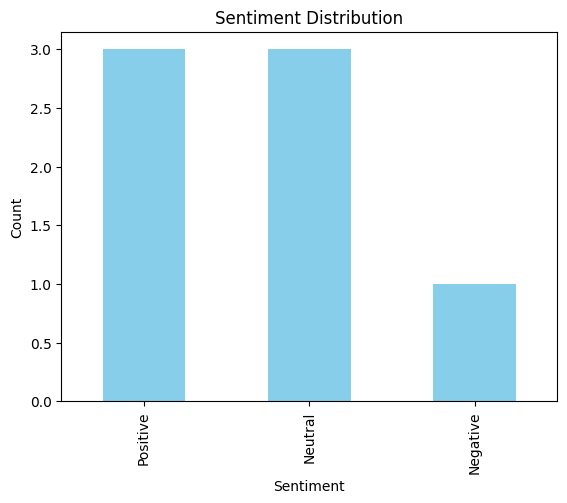

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab')

# Load the text file
file_path = "Text 1.txt"
with open(file_path, "r") as file:
    text_data = file.readlines()

# Create a DataFrame from the text file
df = pd.DataFrame({"text": text_data})

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return " ".join(lemmatized_words)

# Sentiment analysis function
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiment_label = "Positive"
    elif sentiment_score < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"
    return sentiment_score, sentiment_label

# Apply preprocessing and sentiment analysis
df["preprocessed_text"] = df["text"].apply(preprocess_text)
df["sentiment_score"], df["sentiment_label"] = zip(*df["preprocessed_text"].apply(analyze_sentiment))

# Display processed data
print("Processed Data:")
print(df)

# Sentiment distribution summary
sentiment_distribution = df["sentiment_label"].value_counts()

# Display sentiment distribution
print("\nSentiment Distribution:")
print(sentiment_distribution)

# Plot sentiment distribution
sentiment_distribution.plot(kind="bar", title="Sentiment Distribution", color="skyblue")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**Write a program to read an image, convert it to grayscale and perform the following tasks:**
1. Display the Discrete Fourier Transform (DFT) magnitude spectrum.
2. Display the Discrete Cosine Transform (DCT) magnitude spectrum.
3. Apply laplacian and weighted average filters to the given image and display the results.

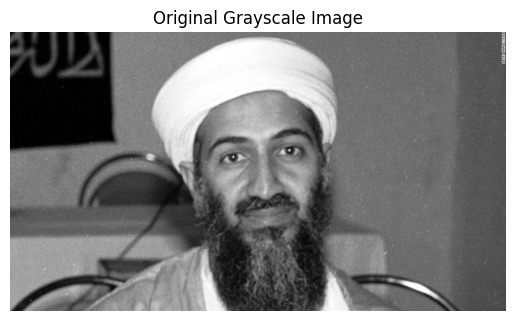

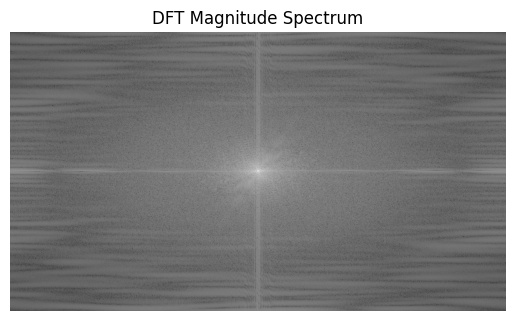

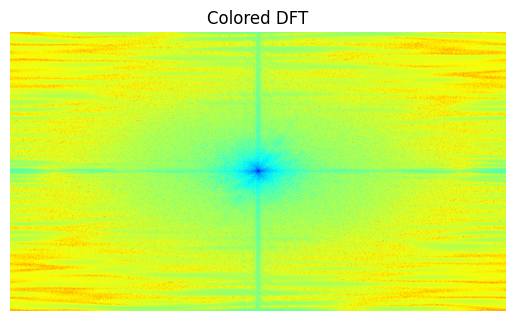

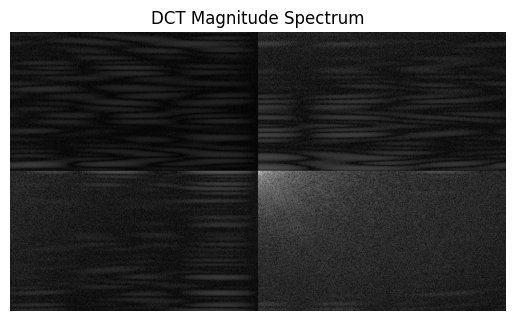

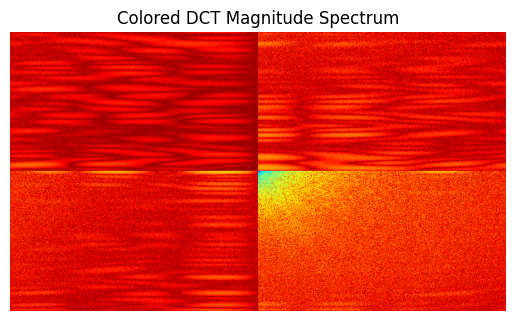

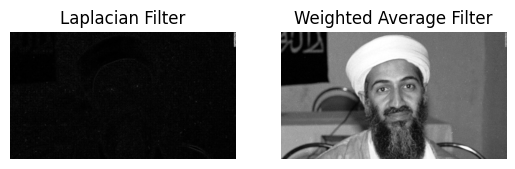

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('R.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Display the DFT magnitude spectrum
def display_dft(image):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
    magnitude_spectrum_normalized = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)
    magnitude_spectrum_8bit = np.uint8(magnitude_spectrum_normalized)
    colored_spectrum = cv2.applyColorMap(magnitude_spectrum_8bit, cv2.COLORMAP_JET)
    colored_dft = cv2.applyColorMap(magnitude_spectrum_8bit, cv2.COLORMAP_JET)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("DFT Magnitude Spectrum")
    plt.axis('off')
    plt.show()

    plt.imshow(colored_dft)
    plt.title("Colored DFT")
    plt.axis('off')
    plt.show()

# 2. Display the DCT magnitude spectrum
def display_dct(image):
    image_float = np.float32(image)
    dct = cv2.dct(image_float)

    # Shift the DCT result to center the low frequencies
    dct_shift = np.fft.fftshift(dct)

    # Compute the magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(dct_shift) + 1)  # Adding 1 to avoid log(0)
    magnitude_spectrum_8bit = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    colored_dct = cv2.applyColorMap(magnitude_spectrum_8bit, cv2.COLORMAP_JET)

    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("DCT Magnitude Spectrum")
    plt.axis('off')
    plt.show()

    plt.imshow(colored_dct)
    plt.title("Colored DCT Magnitude Spectrum")
    plt.axis('off')
    plt.show()

# 3. Apply Laplacian and weighted average filters
def apply_filters(image):
    # Laplacian filter
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))

    # Weighted average filter (mean filter)
    kernel = np.ones((3, 3), np.float32) / 9
    weighted_average = cv2.filter2D(image, -1, kernel)

    # Display results
    plt.subplot(1, 2, 1)
    plt.imshow(laplacian, cmap='gray')
    plt.title("Laplacian Filter")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(weighted_average, cmap='gray')
    plt.title("Weighted Average Filter")
    plt.axis('off')

    plt.show()

# Execute tasks
if image is not None:
    plt.imshow(image, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis('off')
    plt.show()

    display_dft(image)
    display_dct(image)
    apply_filters(image)
else:
    print("Error: Image not found. Please ensure the file path is correct.")

**Q. Write a program to read an image, convert it to grayscale and perform the following tasks**
1. Display the output of walsh hadamard transformation
2. Display the output of slant transformation
3. Apply composite masking filter,sobel filter to the given image and display the results

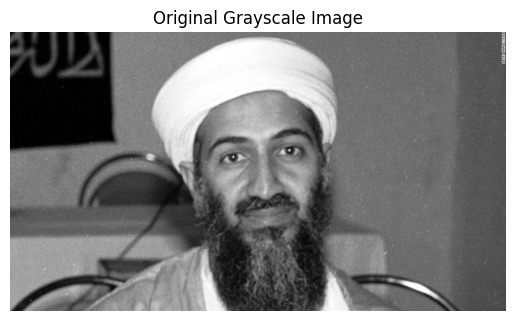

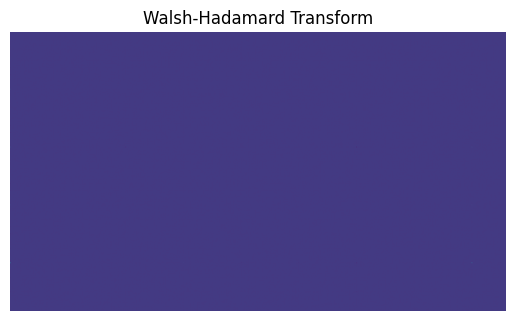

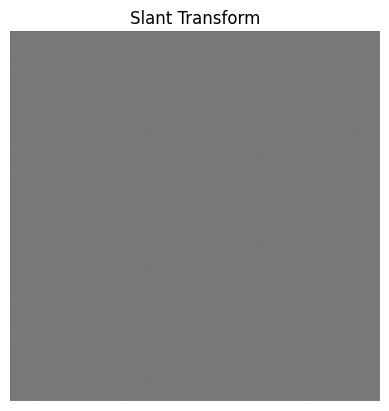

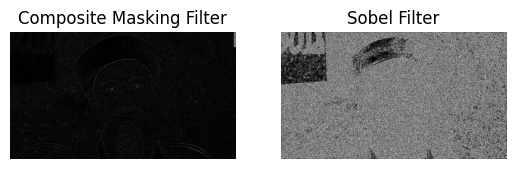

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hadamard
from scipy.fftpack import dct

# Load the image and convert to grayscale
image = cv2.imread('R.jpg', cv2.IMREAD_GRAYSCALE)

# Ensure image is loaded
if image is None:
    print("Error: Image not found. Please ensure the file path is correct.")
else:
    # Display the original image
    plt.imshow(image, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis('off')
    plt.show()

# 1. Display the output of Walsh-Hadamard transformation
def walsh_hadamard_transform(image):
    rows, cols = image.shape
    # Find the next power of 2 greater than or equal to the maximum dimension
    N = 2**(int(np.ceil(np.log2(max(rows, cols)))))

    # Generate a square Hadamard matrix of size N x N
    h = hadamard(N)

    # Pad the image with zeros to make it square with dimensions N x N
    padded_image = np.pad(image, ((0, N - rows), (0, N - cols)), 'constant', constant_values=0)

    # Perform the Walsh-Hadamard transform on the padded image
    transformed_image = np.dot(np.dot(h, padded_image), h.T)

    # Extract the relevant portion of the transformed image (original image size)
    transformed_image = transformed_image[:rows, :cols]

    # Normalize and convert to uint8 for display
    transformed_image = cv2.normalize(transformed_image, None, 0, 255, cv2.NORM_MINMAX)
    transformed_image = np.uint8(transformed_image)

    plt.imshow(transformed_image)
    plt.title("Walsh-Hadamard Transform")
    plt.axis('off')
    plt.show()



# 2. Display the output of slant transformation
def slant_transform(image):
    def slant_matrix(n):
        S = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                S[i, j] = (
                    np.sqrt(2 / n) * (np.cos((np.pi / 4) * (i + j)) - np.sin((np.pi / 4) * (i - j)))
                )
        return S

    n = image.shape[0]
    if n & (n - 1) != 0:  # Resize if not square
        next_pow2 = 2 ** int(np.ceil(np.log2(max(image.shape))))
        image_resized = cv2.resize(image, (next_pow2, next_pow2))
    else:
        image_resized = image

    S = slant_matrix(image_resized.shape[0])
    transformed = S @ image_resized @ S.T
    plt.imshow(np.log1p(np.abs(transformed)), cmap='gray')
    plt.title("Slant Transform")
    plt.axis('off')
    plt.show()

# 3. Apply composite masking filter and Sobel filter
def apply_filters(image):
    # Composite masking filter
    kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])  # Example mask
    composite_mask = cv2.filter2D(image, -1, kernel)

    # Sobel filter
    # Apply Sobel filter
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # X direction
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Y direction
    sobel_combined = cv2.addWeighted(np.absolute(sobelx), 0.5, np.absolute(sobely), 0.5, 0)
    sobel_combined = np.uint8(sobel_combined)

    # Display results
    plt.subplot(1, 2, 1)
    plt.imshow(composite_mask, cmap='gray')
    plt.title("Composite Masking Filter")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title("Sobel Filter")
    plt.axis('off')

    plt.show()

# Perform tasks
if image is not None:
    walsh_hadamard_transform(image)
    slant_transform(image)
    apply_filters(image)


**Implement an audio data analysis pipeline to explore and extract fundamental audio features. Use the given audio dataset to perform the following tasks**
1. Load an audio file and visualize its waveform to analyze its time period, amplitude, and
frequency characteristics.
2. Extract the following key audio features:
a. Amplitude Envelope
b. Loudness (in decibels)
c. Mel-Frequency Cepstral Coefficients (MFCC)
d. Spectral Centroid
3. Visualize these features using appropriate plots

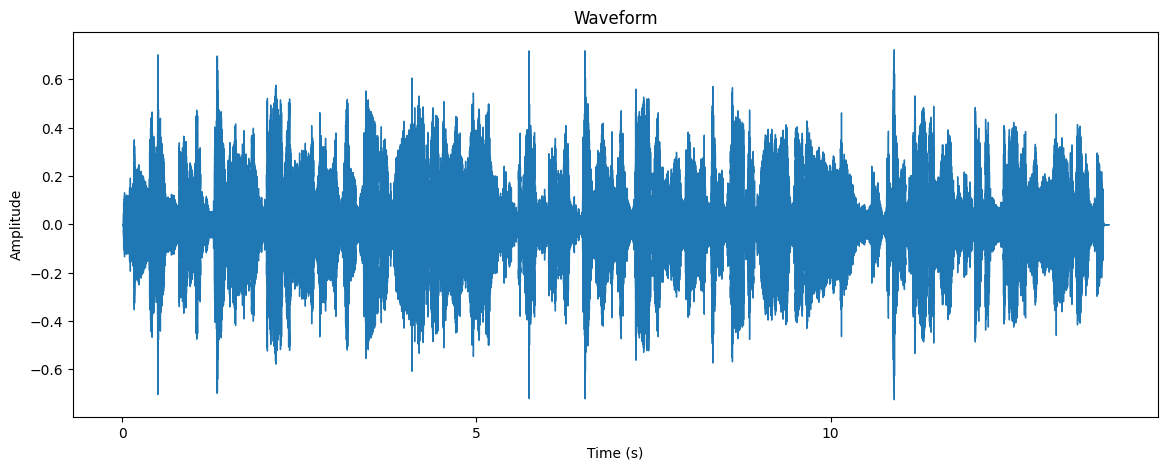

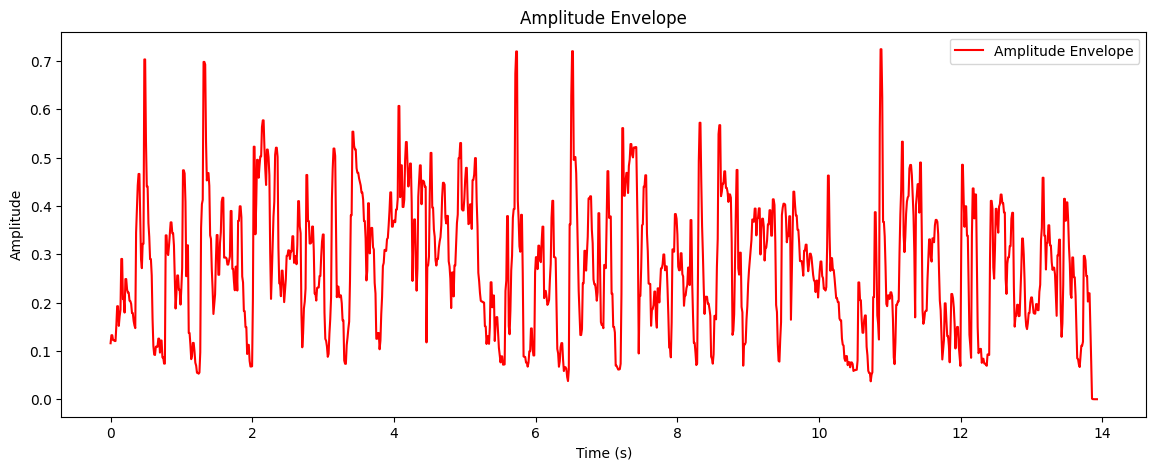

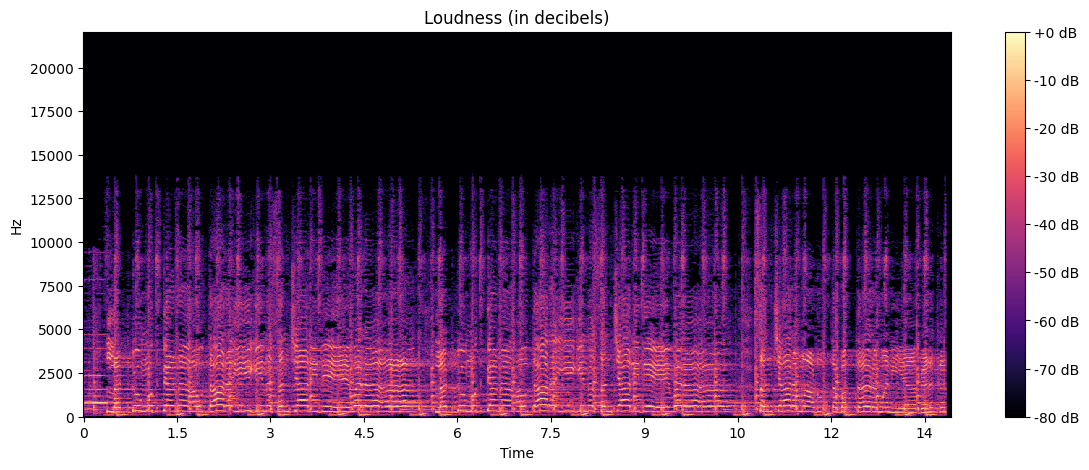

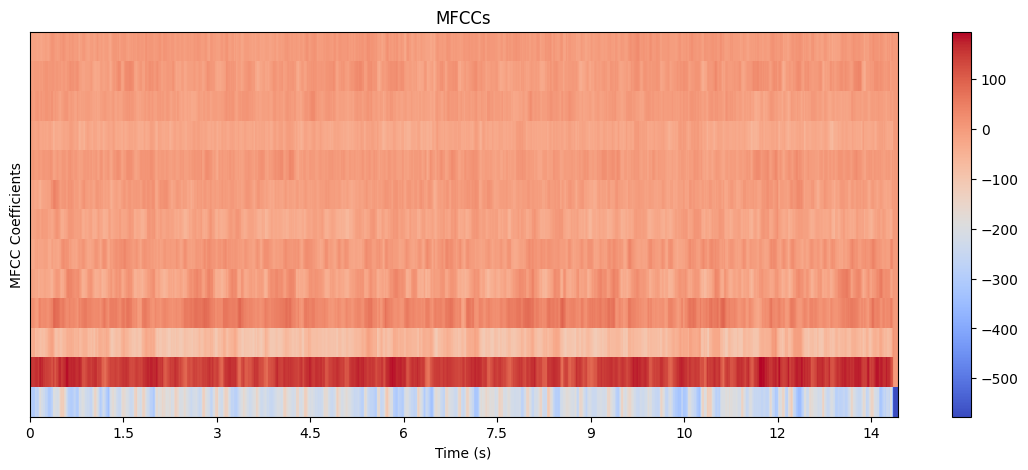

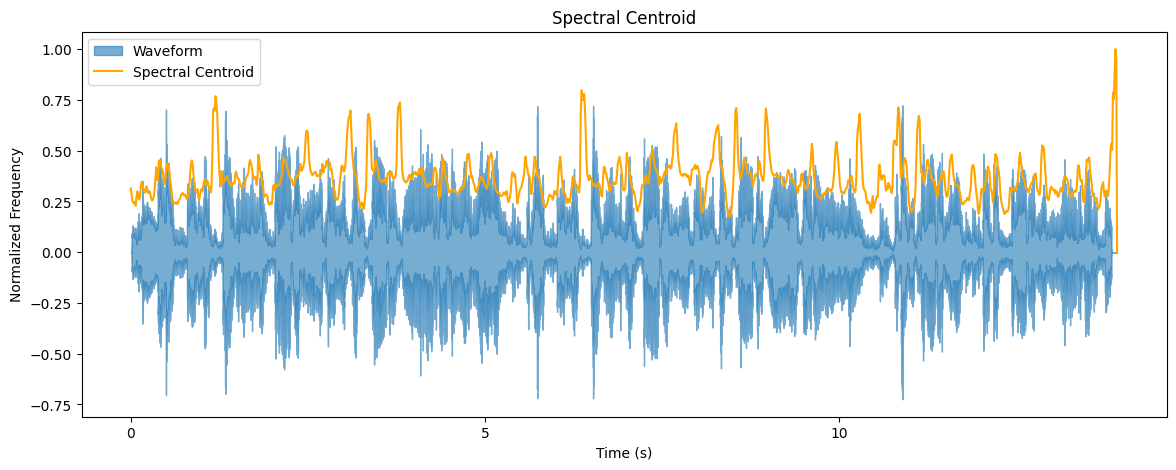

Audio Features Summary:
Amplitude Envelope: (1200,)
Loudness: (1025, 1200)
MFCCs Shape: (13, 1200)
Spectral Centroid Shape: (1200,)


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_path = '/content/Laddu Mutya.mp3'  # Replace with the path to your audio file
y, sr = librosa.load(audio_path, sr=None)

# 1. Visualize the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# 2a. Amplitude Envelope
def amplitude_envelope(signal, frame_size, hop_length):
    return np.array([
        max(signal[i:i + frame_size])
        for i in range(0, len(signal), hop_length)
    ])

frame_size = 1024
hop_length = 512
amp_env = amplitude_envelope(y, frame_size, hop_length)
time_env = np.linspace(0, len(y) / sr, len(amp_env))

plt.figure(figsize=(14, 5))
plt.plot(time_env, amp_env, label="Amplitude Envelope", color="red")
plt.title("Amplitude Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# 2b. Loudness (in decibels)
loudness = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(loudness, sr=sr, x_axis="time", y_axis="hz", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title("Loudness (in decibels)")
plt.show()

# 2c. Mel-Frequency Cepstral Coefficients (MFCC)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar()
plt.title("MFCCs")
plt.ylabel("MFCC Coefficients")
plt.xlabel("Time (s)")
plt.show()

# 2d. Spectral Centroid
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
time_centroids = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6, label="Waveform")
plt.plot(time_centroids, spectral_centroids / np.max(spectral_centroids), color="orange", label="Spectral Centroid")
plt.title("Spectral Centroid")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.show()

# Summary of Features
print("Audio Features Summary:")
print(f"Amplitude Envelope: {amp_env.shape}")
print(f"Loudness: {loudness.shape}")
print(f"MFCCs Shape: {mfccs.shape}")
print(f"Spectral Centroid Shape: {spectral_centroids.shape}")

**Implement an audio data analysis pipeline to explore and extract fundamental audio features. Use the given audio dataset to perform the following tasks**
1. Load an audio file and visualize its waveform to analyze its time period, amplitude, and
frequency characteristics.
2. Extract the following key audio features:
a.Chroma Features
b. Spectral Contrast
c. Pitch Salience
d. Spectral Centroid
3. Visualize these features using appropriate plots

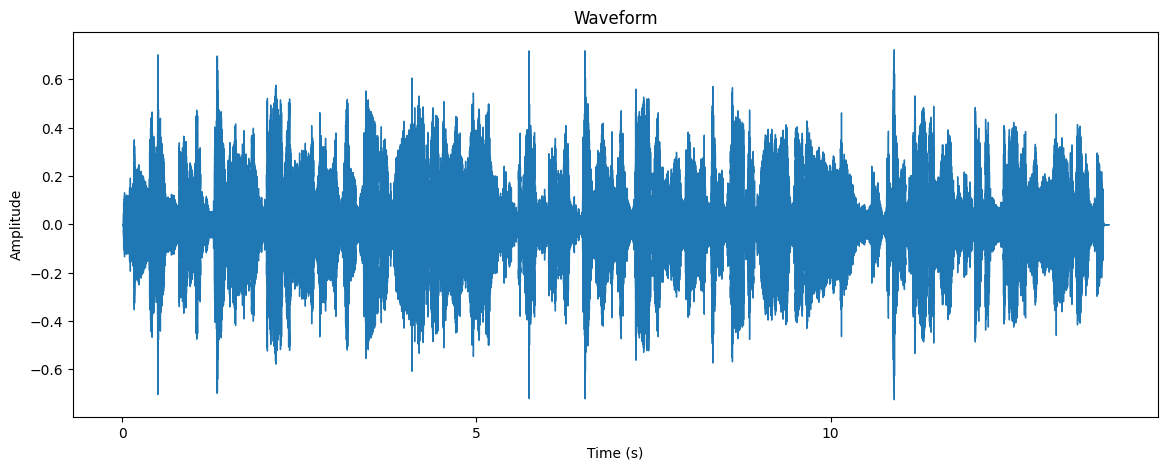

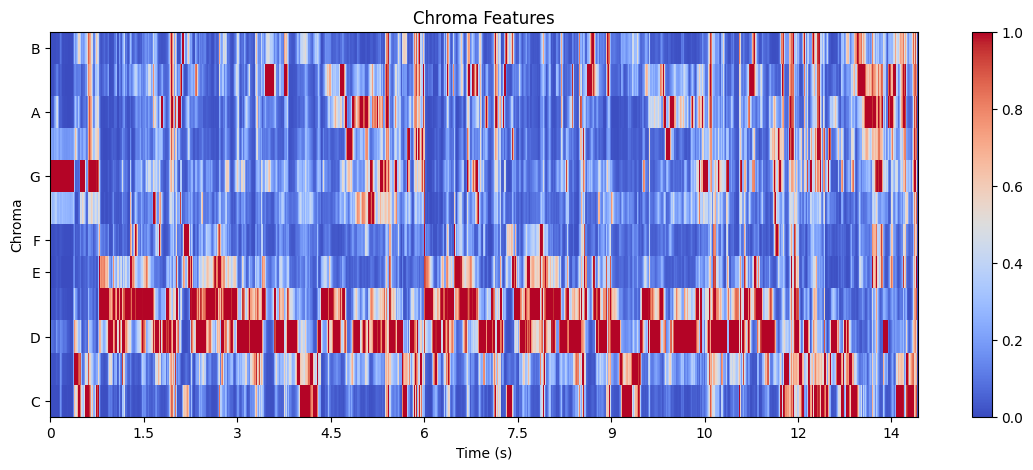

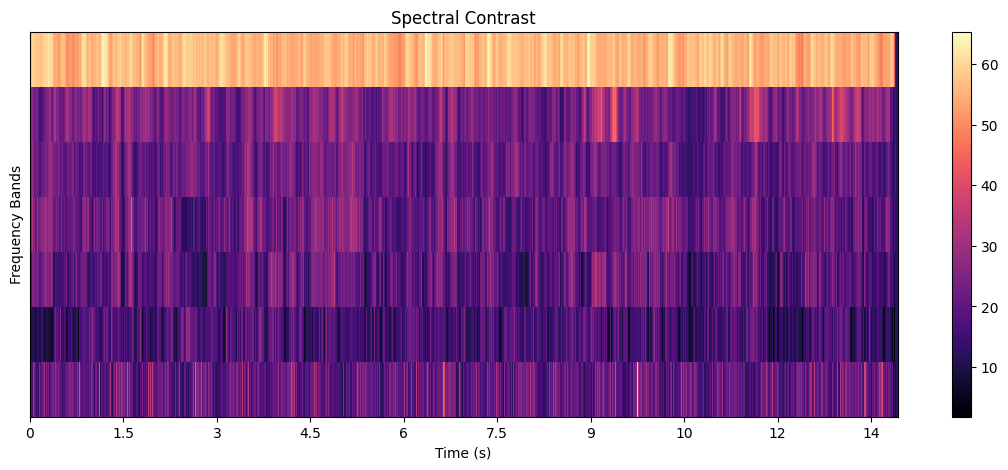

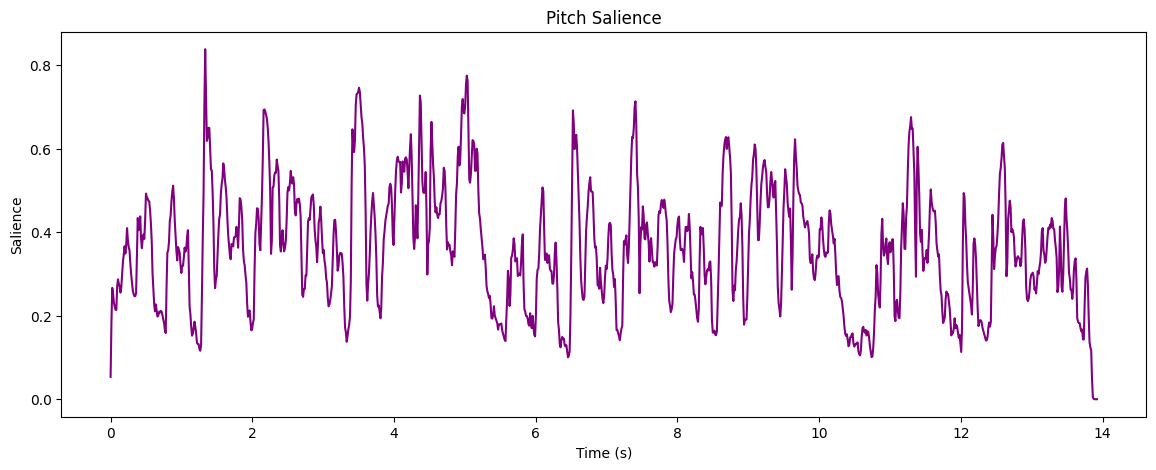

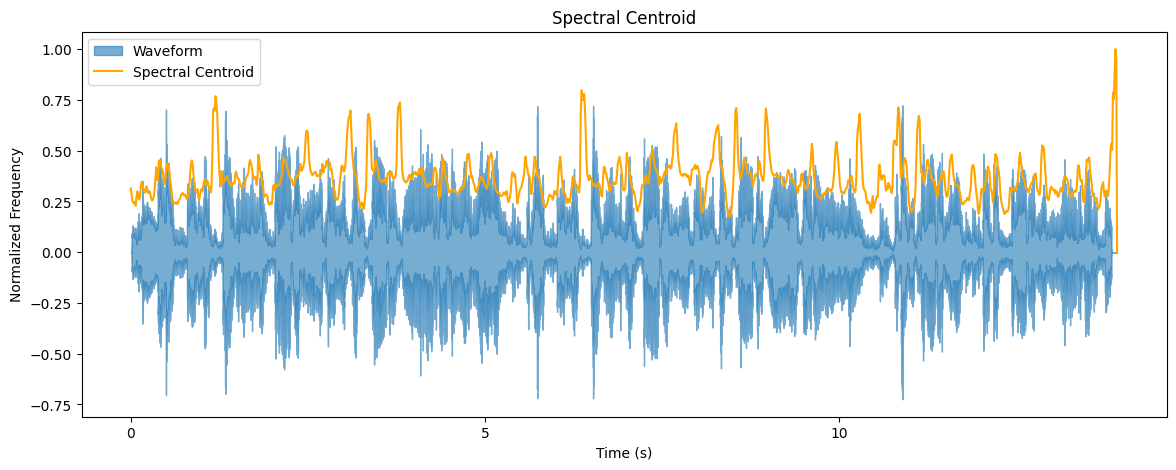

Audio Features Summary:
Chroma Shape: (12, 1200)
Spectral Contrast Shape: (7, 1200)
Pitch Salience Length: 1200
Spectral Centroid Shape: (1200,)


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_path = '/content/Laddu Mutya.mp3'  # Replace with the path to your audio file
y, sr = librosa.load(audio_path, sr=None)

# 1. Visualize the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# 2a. Chroma Features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm', sr=sr)
plt.colorbar()
plt.title("Chroma Features")
plt.xlabel("Time (s)")
plt.ylabel("Chroma")
plt.show()

# 2b. Spectral Contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(spectral_contrast, x_axis='time', sr=sr)
plt.colorbar()
plt.title("Spectral Contrast")
plt.xlabel("Time (s)")
plt.ylabel("Frequency Bands")
plt.show()

# 2c. Pitch Salience
harmonics, _ = librosa.effects.hpss(y)  # Harmonic component for pitch
pitch_salience = np.mean(np.abs(librosa.stft(harmonics)), axis=0)
time_pitch = librosa.frames_to_time(np.arange(len(pitch_salience)), sr=sr)

plt.figure(figsize=(14, 5))
plt.plot(time_pitch, pitch_salience, color="purple")
plt.title("Pitch Salience")
plt.xlabel("Time (s)")
plt.ylabel("Salience")
plt.show()

# 2d. Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
time_centroid = librosa.frames_to_time(np.arange(len(spectral_centroid)), sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6, label="Waveform")
plt.plot(time_centroid, spectral_centroid / np.max(spectral_centroid), color="orange", label="Spectral Centroid")
plt.title("Spectral Centroid")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.show()

# Summary of Features
print("Audio Features Summary:")
print(f"Chroma Shape: {chroma.shape}")
print(f"Spectral Contrast Shape: {spectral_contrast.shape}")
print(f"Pitch Salience Length: {len(pitch_salience)}")
print(f"Spectral Centroid Shape: {spectral_centroid.shape}")

**Implement AI-based search algorithms using NumPy and TensorFlow to solve a pathfinding problem. Your task involves the following steps:**
1. Implement the DFS algorithm using NumPy to find a path from the start node to the goal node.
2. Visualize the explored path on the graph.
3. Analyze and report the time complexity and space complexity of DFS for this implementation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Create a graph as an adjacency matrix
def create_graph():
    graph = np.array([
        [0, 1, 1, 0, 0, 0],
        [1, 0, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 1],
        [0, 0, 1, 1, 0, 1],
        [0, 0, 0, 1, 1, 0],
    ])
    return graph

# DFS implementation
def dfs(graph, start, goal):
    stack = [start]
    visited = []
    path = []

    while stack:
        current = stack.pop()
        if current not in visited:
            visited.append(current)
            path.append(current)

            if current == goal:
                return path

            # Add neighbors in reverse order to explore in correct order
            neighbors = np.where(graph[current] == 1)[0]
            for neighbor in reversed(neighbors):
                if neighbor not in visited:
                    stack.append(neighbor)
    return None  # If no path is found

# Graph visualization with the explored path
def visualize_graph(graph, path):
    fig, ax = plt.subplots()
    num_nodes = graph.shape[0]
    positions = np.linspace(0, 2 * np.pi, num_nodes, endpoint=False)
    x = np.cos(positions)
    y = np.sin(positions)

    # Plot nodes
    ax.scatter(x, y, s=100, color='blue', label='Nodes')
    for i, (xi, yi) in enumerate(zip(x, y)):
        ax.text(xi, yi, str(i), fontsize=12, ha='center', va='center')

    # Plot edges
    for i in range(num_nodes):
        for j in range(num_nodes):
            if graph[i, j] == 1:
                ax.plot([x[i], x[j]], [y[i], y[j]], 'gray', alpha=0.5)

    # Highlight the explored path
    for i in range(len(path) - 1):
        start_node = path[i]
        end_node = path[i + 1]
        ax.plot([x[start_node], x[end_node]], [y[start_node], y[end_node]], 'red', lw=2, label='Path' if i == 0 else "")

    ax.set_title("Graph Visualization with Explored Path")
    plt.legend()
    plt.show()

# Run the algorithm
graph = create_graph()
start_node = 0
goal_node = 5

start_time = time.time()
path = dfs(graph, start_node, goal_node)
end_time = time.time()

print("DFS Path:", path)
print("Execution Time:", end_time - start_time, "seconds")

DFS Path: [0, 1, 2, 4, 3, 5]
Execution Time: 0.005270242691040039 seconds


**Implement AI-based search algorithms using NumPy and TensorFlow to solve a pathfinding problem in a grid environment. Your task involves the following steps:**
1. Implement the A* algorithm using NumPy and TensorFlow.
2. Use a suitable heuristic function (Manhattan distance or Euclidean distance).
3. Display the path found, its cost, and the explored nodes on the grid.
4. Analyze and report the time complexity and space complexity of A* for this implementation.

Path Found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
Path Cost: 8
Explored Nodes: 11


<ipython-input-37-58d4e46fd688>:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", 4)


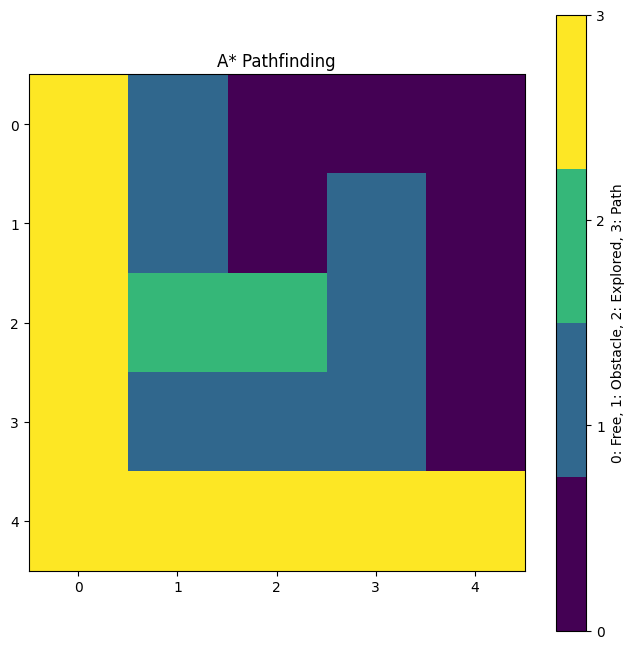

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from heapq import heappush, heappop

# Define the grid environment
def create_grid():
    grid = np.array([
        [0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0],
    ])
    return grid

# Define the heuristic function (Manhattan distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* algorithm
def a_star(grid, start, goal):
    rows, cols = grid.shape
    open_set = []
    heappush(open_set, (0, start))  # (priority, node)
    came_from = {}  # To reconstruct the path
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    explored_nodes = []

    while open_set:
        _, current = heappop(open_set)
        explored_nodes.append(current)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, g_score[goal], explored_nodes

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_set, (f_score[neighbor], neighbor))

    return None, float('inf'), explored_nodes  # If no path is found

# Visualize the grid, path, and explored nodes
def visualize_path(grid, path, explored_nodes):
    grid_display = np.copy(grid)
    for node in explored_nodes:
        if grid_display[node] == 0:  # Mark explored nodes
            grid_display[node] = 2
    for node in path:
        grid_display[node] = 3  # Mark path

    plt.figure(figsize=(8, 8))
    cmap = plt.cm.get_cmap("viridis", 4)
    plt.imshow(grid_display, cmap=cmap, origin="upper")
    plt.colorbar(ticks=range(4), label="0: Free, 1: Obstacle, 2: Explored, 3: Path")
    plt.title("A* Pathfinding")
    plt.show()

# Main execution
grid = create_grid()
start = (0, 0)
goal = (4, 4)

path, cost, explored_nodes = a_star(grid, start, goal)

print("Path Found:", path)
print("Path Cost:", cost)
print("Explored Nodes:", len(explored_nodes))

visualize_path(grid, path, explored_nodes)

**Q. Implement the Genetic Algorithm to find a near-optimal solution for the Traveling Salesman Problem (TSP):**
1. Use the following components in the algorithm:
    i. Selection: Choose individuals from the population based on fitness.
    ii. Crossover: Combine parent solutions to create offspring.
    iii. Mutation: Introduce randomness by altering routes.
2. Display the best route and its total distance after a set number of generations.
3. Analyze the performance in terms of efficiency and proximity to the optimal route.


Best Route: [15  8 13  0 19  5 16 14 11  1  3 17 10  2  7  9  6 12  4 18]
Best Distance: 422.9196625105139


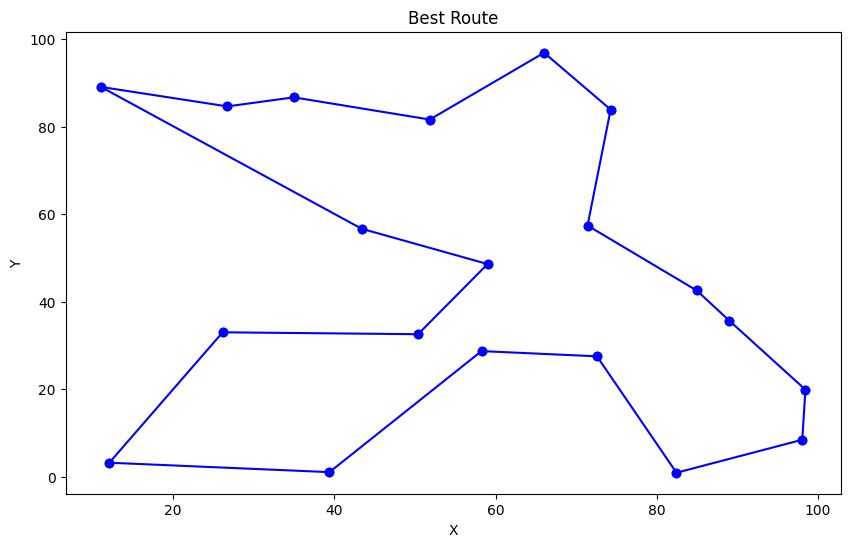

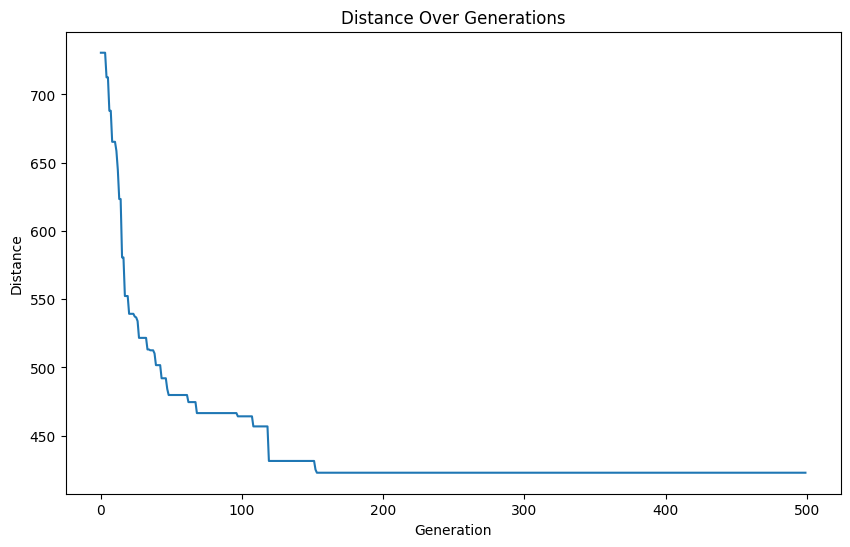

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Distance matrix for the cities
def generate_distance_matrix(num_cities):
    points = np.random.rand(num_cities, 2) * 100  # Random city coordinates
    distance_matrix = np.sqrt(((points[:, np.newaxis] - points[np.newaxis, :]) ** 2).sum(axis=2))
    return points, distance_matrix

# Calculate the total distance of a route
def calculate_distance(route, distance_matrix):
    return sum(distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1)) + distance_matrix[route[-1], route[0]]

# Generate initial population
def generate_population(pop_size, num_cities):
    population = [np.random.permutation(num_cities) for _ in range(pop_size)]
    return population

# Selection using tournament method
def selection(population, fitness, num_parents):
    selected = []
    for _ in range(num_parents):
        tournament = random.sample(list(zip(population, fitness)), k=3)
        winner = min(tournament, key=lambda x: x[1])  # Select individual with best fitness (shortest distance)
        selected.append(winner[0])
    return selected

# Crossover using ordered crossover (OX)
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[start:end + 1] = parent1[start:end + 1]

    parent2_idx = 0
    for i in range(size):
        if child[i] == -1:
            while parent2[parent2_idx] in child:
                parent2_idx += 1
            child[i] = parent2[parent2_idx]
    return np.array(child)

# Mutation by swapping two cities
def mutate(route, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(route)), 2)
        route[i], route[j] = route[j], route[i]
    return route

# Genetic Algorithm implementation
def genetic_algorithm(num_cities, pop_size, num_generations, mutation_rate):
    points, distance_matrix = generate_distance_matrix(num_cities)
    population = generate_population(pop_size, num_cities)
    best_distance = float('inf')
    best_route = None
    history = []

    for generation in range(num_generations):
        fitness = [calculate_distance(route, distance_matrix) for route in population]
        best_idx = np.argmin(fitness)
        if fitness[best_idx] < best_distance:
            best_distance = fitness[best_idx]
            best_route = population[best_idx]

        history.append(best_distance)
        parents = selection(population, fitness, pop_size // 2)

        next_generation = []
        for i in range(0, len(parents), 2):
            if i + 1 < len(parents):
                child1 = crossover(parents[i], parents[i + 1])
                child2 = crossover(parents[i + 1], parents[i])
                next_generation.extend([child1, child2])
            else:
                next_generation.append(parents[i])

        next_generation = [mutate(route, mutation_rate) for route in next_generation]
        population = next_generation

    return best_route, best_distance, points, history

def main():
    num_cities = 20
    pop_size = 100
    num_generations = 500
    mutation_rate = 0.1

    best_route, best_distance, points, history = genetic_algorithm(num_cities, pop_size, num_generations, mutation_rate)

    print("Best Route:", best_route)
    print("Best Distance:", best_distance)

    # Plot the best route
    plt.figure(figsize=(10, 6))
    for i in range(len(best_route)):
        start = points[best_route[i]]
        end = points[best_route[(i + 1) % len(best_route)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'bo-')
    plt.title("Best Route")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    # Plot the history of best distances
    plt.figure(figsize=(10, 6))
    plt.plot(history)
    plt.title("Distance Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Distance")
    plt.show()

main()

**Q. Implement a Tic-Tac-Toe game where two AI players compete against each other. The AI should make valid moves based on predefined strategies.**
1. Create a 3X3 Tic-Tac-Toe game board.
2. Implement a Machine vs. Machine mode:
a. Both AI players make random valid moves until the game ends.
b. Track and display the sequence of moves.
3. Display the game board after each move and indicate the winner or a draw at the end of
the game.
4. Analyze the results by playing multiple games and observing win/draw probabilities.

In [ ]:
import random
import numpy as np

# Function to initialize the game board
def initialize_board():
    return np.full((3, 3), " ")

# Function to display the board
def display_board(board):
    print("\n".join([" | ".join(row) for row in board]))
    print("-" * 9)

# Function to check for a winner
def check_winner(board):
    # Check rows, columns, and diagonals
    for i in range(3):
        if len(set(board[i, :])) == 1 and board[i, 0] != " ":
            return board[i, 0]
        if len(set(board[:, i])) == 1 and board[0, i] != " ":
            return board[0, i]
    if len(set([board[i, i] for i in range(3)])) == 1 and board[0, 0] != " ":
        return board[0, 0]
    if len(set([board[i, 2 - i] for i in range(3)])) == 1 and board[0, 2] != " ":
        return board[0, 2]
    return None

# Function to check for a draw
def is_draw(board):
    return " " not in board

# Function for AI to make a random valid move
def ai_move(board, marker):
    empty_cells = [(i, j) for i in range(3) for j in range(3) if board[i, j] == " "]
    move = random.choice(empty_cells)
    board[move] = marker
    return move

# Play one game of Tic-Tac-Toe
def play_game():
    board = initialize_board()
    moves_sequence = []
    display_board(board)
    print("\nGame Start\n")

    # Players take turns (X and O)
    players = ["X", "O"]
    turn = 0

    while True:
        current_player = players[turn % 2]
        move = ai_move(board, current_player)
        moves_sequence.append((current_player, move))
        print(f"\nPlayer {current_player} moves to {move}")
        display_board(board)

        winner = check_winner(board)
        if winner:
            print(f"\nPlayer {winner} wins!")
            return winner, moves_sequence

        if is_draw(board):
            print("\nThe game is a draw!")
            return "Draw", moves_sequence

        turn += 1

# Play multiple games and analyze results
def analyze_games(num_games):
    results = {"X": 0, "O": 0, "Draw": 0}

    for game in range(num_games):
        print(f"\nGame {game + 1}:")
        winner, moves = play_game()
        results[winner] += 1

    # Display results
    print("\nFinal Results:")
    for result, count in results.items():
        print(f"{result}: {count} ({(count / num_games) * 100:.2f}%)")

# Main function to execute the program
if __name__ == "__main__":
    num_games = 5  # Number of games to play
    analyze_games(num_games)



Game 1:
  |   |  
  |   |  
  |   |  
---------

Game Start


Player X moves to (0, 2)
  |   | X
  |   |  
  |   |  
---------

Player O moves to (1, 1)
  |   | X
  | O |  
  |   |  
---------

Player X moves to (1, 2)
  |   | X
  | O | X
  |   |  
---------

Player O moves to (1, 0)
  |   | X
O | O | X
  |   |  
---------

Player X moves to (0, 1)
  | X | X
O | O | X
  |   |  
---------

Player O moves to (0, 0)
O | X | X
O | O | X
  |   |  
---------

Player X moves to (2, 2)
O | X | X
O | O | X
  |   | X
---------

Player X wins!

Game 2:
  |   |  
  |   |  
  |   |  
---------

Game Start


Player X moves to (2, 2)
  |   |  
  |   |  
  |   | X
---------

Player O moves to (2, 0)
  |   |  
  |   |  
O |   | X
---------

Player X moves to (1, 2)
  |   |  
  |   | X
O |   | X
---------

Player O moves to (1, 0)
  |   |  
O |   | X
O |   | X
---------

Player X moves to (0, 1)
  | X |  
O |   | X
O |   | X
---------

Player O moves to (0, 2)
  | X | O
O |   | X
O |   | X
---------

P

**Q. Implement a Tic-Tac-Toe game where a human player competes against an AI. The AI should use basic decision-making strategies to provide a challenging gameplay experience.**
1. Create a 3$\times$3 Tic-Tac-Toe game board.
2. Implement a Human vs. Machine mode:
a. Allow the human player to choose whether to play first or second.
b. The AI should make its moves using a strategy such as:
Block the opponent's winning move.
Prioritize moves to win if possible.
3. Display the game board after every move.
4. Indicate the winner, a draw, or the next player's turn clearly.

In [ ]:
import numpy as np

# Initialize the game board
def initialize_board():
    return np.full((3, 3), " ")

# Display the game board
def display_board(board):
    print("\n".join([" | ".join(row) for row in board]))
    print("-" * 9)

# Check for a winner
def check_winner(board):
    # Check rows, columns, and diagonals
    for i in range(3):
        if len(set(board[i, :])) == 1 and board[i, 0] != " ":
            return board[i, 0]
        if len(set(board[:, i])) == 1 and board[0, i] != " ":
            return board[0, i]
    if len(set([board[i, i] for i in range(3)])) == 1 and board[0, 0] != " ":
        return board[0, 0]
    if len(set([board[i, 2 - i] for i in range(3)])) == 1 and board[0, 2] != " ":
        return board[0, 2]
    return None

# Check if the board is full (draw)
def is_draw(board):
    return " " not in board

# Allow the human player to make a move
def human_move(board):
    while True:
        try:
            row, col = map(int, input("Enter your move (row and column as 0 1): ").split())
            if board[row, col] == " ":
                board[row, col] = "O"  # Human plays as 'O'
                return
            else:
                print("Cell is already occupied. Try again.")
        except (ValueError, IndexError):
            print("Invalid input. Enter row and column numbers between 0 and 2.")

# AI strategy for making a move
def ai_move(board):
    # Check if AI can win
    for i in range(3):
        for j in range(3):
            if board[i, j] == " ":
                board[i, j] = "X"
                if check_winner(board) == "X":
                    return
                board[i, j] = " "

    # Block opponent's winning move
    for i in range(3):
        for j in range(3):
            if board[i, j] == " ":
                board[i, j] = "O"
                if check_winner(board) == "O":
                    board[i, j] = "X"
                    return
                board[i, j] = " "

    # Prioritize center
    if board[1, 1] == " ":
        board[1, 1] = "X"
        return

    # Choose a corner
    for i, j in [(0, 0), (0, 2), (2, 0), (2, 2)]:
        if board[i, j] == " ":
            board[i, j] = "X"
            return

    # Choose a random empty cell
    for i in range(3):
        for j in range(3):
            if board[i, j] == " ":
                board[i, j] = "X"
                return

# Play a single game of Human vs. AI
def play_game():
    board = initialize_board()
    print("Welcome to Tic-Tac-Toe!")
    player_choice = input("Do you want to play first? (y/n): ").strip().lower()
    human_first = player_choice == "y"

    print("You are 'O'. AI is 'X'.")
    display_board(board)

    turn = 0
    while True:
        if (turn % 2 == 0 and human_first) or (turn % 2 == 1 and not human_first):
            print("\nYour turn!")
            human_move(board)
        else:
            print("\nAI's turn!")
            ai_move(board)

        display_board(board)
        winner = check_winner(board)
        if winner:
            if winner == "O":
                print("\nCongratulations! You win!")
            else:
                print("\nAI wins! Better luck next time.")
            break

        if is_draw(board):
            print("\nIt's a draw!")
            break

        turn += 1

# Run the game
if __name__ == "__main__":
    play_game()

Welcome to Tic-Tac-Toe!
Do you want to play first? (y/n): n
You are 'O'. AI is 'X'.
  |   |  
  |   |  
  |   |  
---------

AI's turn!
  |   |  
  | X |  
  |   |  
---------

Your turn!
Enter your move (row and column as 0 1): 0 0
O |   |  
  | X |  
  |   |  
---------

AI's turn!
O |   | X
  | X |  
  |   |  
---------

Your turn!
Enter your move (row and column as 0 1): 2 0
O |   | X
  | X |  
O |   |  
---------

AI's turn!
O |   | X
X | X |  
O |   |  
---------

Your turn!
Enter your move (row and column as 0 1): 1 2
O |   | X
X | X | O
O |   |  
---------

AI's turn!
O |   | X
X | X | O
O |   | X
---------

Your turn!
Enter your move (row and column as 0 1): 0 1
O | O | X
X | X | O
O |   | X
---------

AI's turn!
O | O | X
X | X | O
O | X | X
---------

It's a draw!
